In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# Ensure the graphs are displayed in notebook

%matplotlib inline

In [3]:
#creating path
path = 'C:/Users/logan/Downloads/CareerFoundry/NBA Stats'

In [4]:
#connecting csv
df = pd.read_csv(os.path.join(path, '02 Data',  'Prepared Data', 'final nba stats set csv position fix.csv'))

In [5]:
# Drop column 'collegel

df = df.drop(columns = ['college'])

In [6]:
#filtering out rows with net_rating above 30 or below -30
df = df[(df['net_rating'] <= 30) & (df['net_rating'] >= -30)]

In [7]:
#filtering out players who played less than five games
df = df[df['gp'] >= 5]

In [8]:
df.head()

,player_id,season,player,team_abbreviation,state,age,player_height,player_weight,country,draft_year,...,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,mvp,position,experience,season_result
0,419,1997,A.C. Green,DAL,Texas,33,205.74,102.0582,United States of America,1985,...,-8.0,0.100,0.207,0.119,0.523,0.045,False,PF,12,No postseason
1,667,1998,A.C. Green,DAL,Texas,34,205.74,102.0582,United States of America,1985,...,-7.2,0.090,0.196,0.118,0.496,0.074,False,PF,13,No postseason
2,1006,1999,A.C. Green,DAL,Texas,35,205.74,102.0582,United States of America,1985,...,-5.6,0.097,0.179,0.148,0.441,0.043,False,PF,14,No postseason
3,9331,2000,A.C. Green,LAL,California,36,205.74,102.0582,United States of America,1985,...,8.1,0.089,0.179,0.111,0.482,0.058,False,PF,15,Champion
4,11196,2001,A.C. Green,MIA,Florida,37,205.74,102.0582,United States of America,1985,...,3.3,0.089,0.171,0.141,0.492,0.050,False,PF,16,Playoffs


In [9]:
# Create a subset which contains only the nuerical values
sub = df[['net_rating','pts', 'reb', 'ast', 'oreb_pct', 'dreb_pct', 'ts_pct', 'ast_pct', 'usg_pct']]

In [10]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12163 entries, 0 to 12841
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   net_rating  12163 non-null  float64
 1   pts         12163 non-null  float64
 2   reb         12163 non-null  float64
 3   ast         12163 non-null  float64
 4   oreb_pct    12163 non-null  float64
 5   dreb_pct    12163 non-null  float64
 6   ts_pct      12163 non-null  float64
 7   ast_pct     12163 non-null  float64
 8   usg_pct     12163 non-null  float64
dtypes: float64(9)
memory usage: 950.2 KB


In [11]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [12]:
score = [kmeans[i].fit(sub).score(sub) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\logan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\logan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\logan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\logan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[-1190428.9075313911,
 -745777.487024687,
 -515538.3954035996,
 -419160.27862059,
 -351994.89179748413,
 -309476.9744971593,
 -271203.3977705551,
 -249209.86396884968,
 -230830.35345718337]

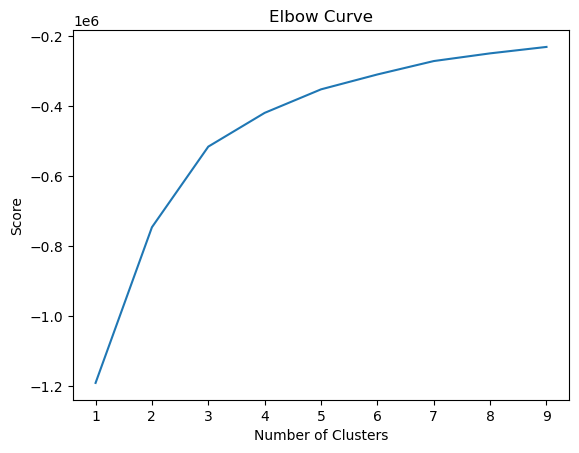

In [13]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### Not a  great looking curve, so we'll try 3

In [14]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [15]:
sub['clusters'] = kmeans.fit_predict(sub)

C:\Users\logan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\logan\AppData\Local\Temp\ipykernel_58204\3683309691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['clusters'] = kmeans.fit_predict(sub)


In [16]:
sub.head()

,net_rating,pts,reb,ast,oreb_pct,dreb_pct,ts_pct,ast_pct,usg_pct,clusters
0,-8.0,7.2,7.9,0.8,0.100,0.207,0.523,0.045,0.119,1
1,-7.2,7.3,8.1,1.5,0.090,0.196,0.496,0.074,0.118,1
2,-5.6,4.9,4.6,0.5,0.097,0.179,0.441,0.043,0.148,1
3,8.1,5.0,5.9,1.0,0.089,0.179,0.482,0.058,0.111,0
4,3.3,4.5,3.8,0.5,0.089,0.171,0.492,0.050,0.141,0


In [17]:
sub['clusters'].value_counts()

clusters
0    5051
1    4202
2    2910
Name: count, dtype: int64

C:\Users\logan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\logan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\logan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


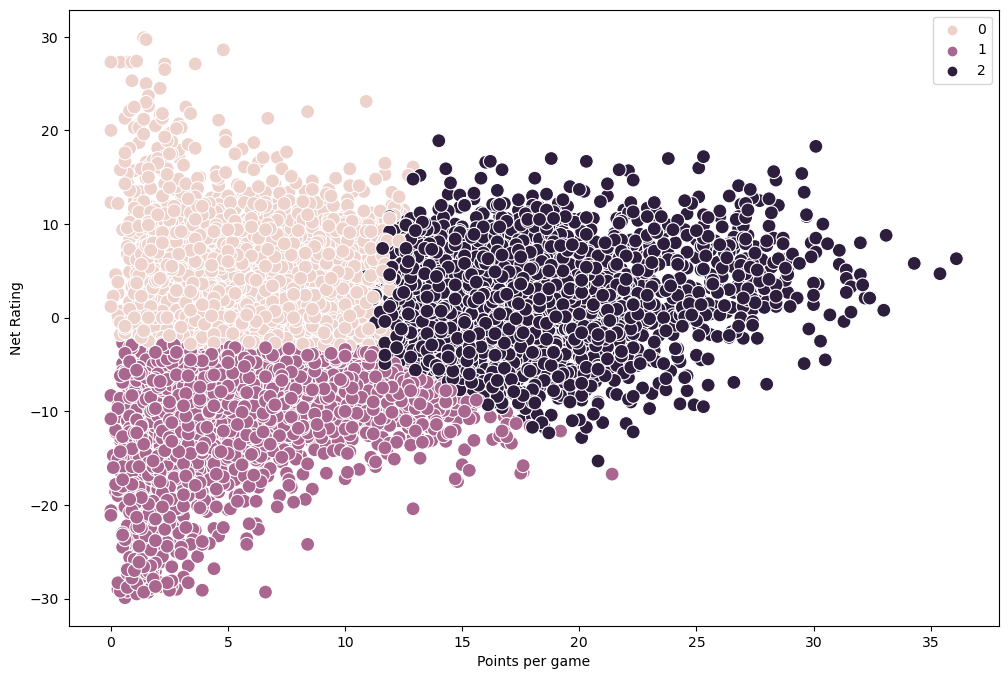

In [18]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['pts'], y=sub['net_rating'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Points per game') # Label x-axis.
plt.ylabel('Net Rating') # Label y-axis.
plt.show()

C:\Users\logan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\logan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\logan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


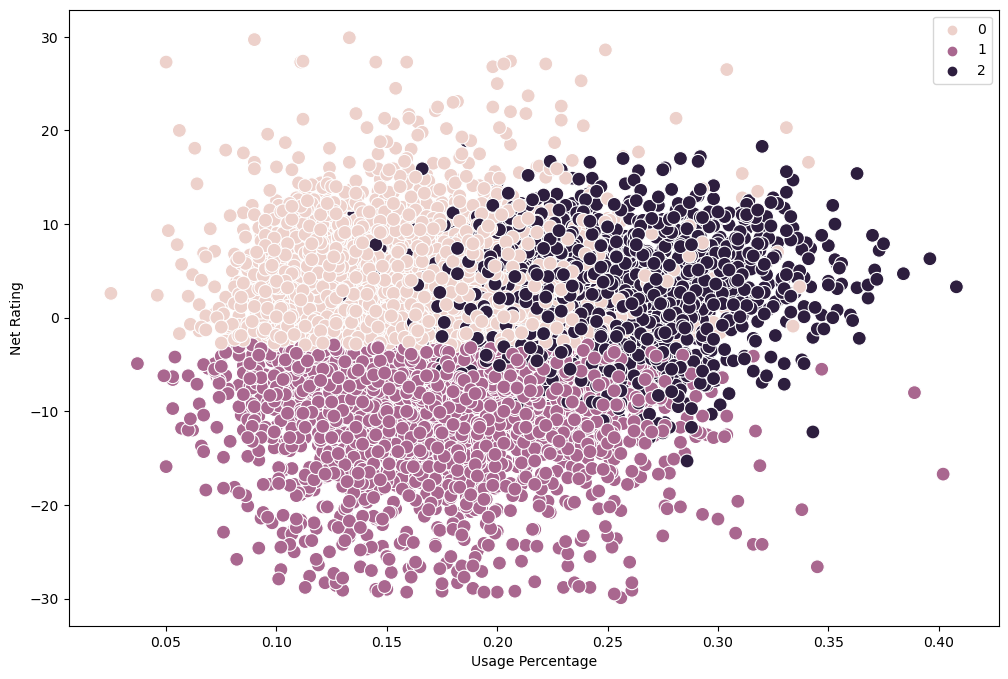

In [19]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['usg_pct'], y=sub['net_rating'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Usage Percentage') # Label x-axis.
plt.ylabel('Net Rating') # Label y-axis.
plt.show()

### These are okay... but let's just try 4

In [20]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [21]:
sub['clusters'] = kmeans.fit_predict(sub)

C:\Users\logan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\logan\AppData\Local\Temp\ipykernel_58204\3683309691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['clusters'] = kmeans.fit_predict(sub)


In [22]:
sub['clusters'].value_counts()

clusters
0    4757
2    3013
3    2673
1    1720
Name: count, dtype: int64

C:\Users\logan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\logan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\logan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


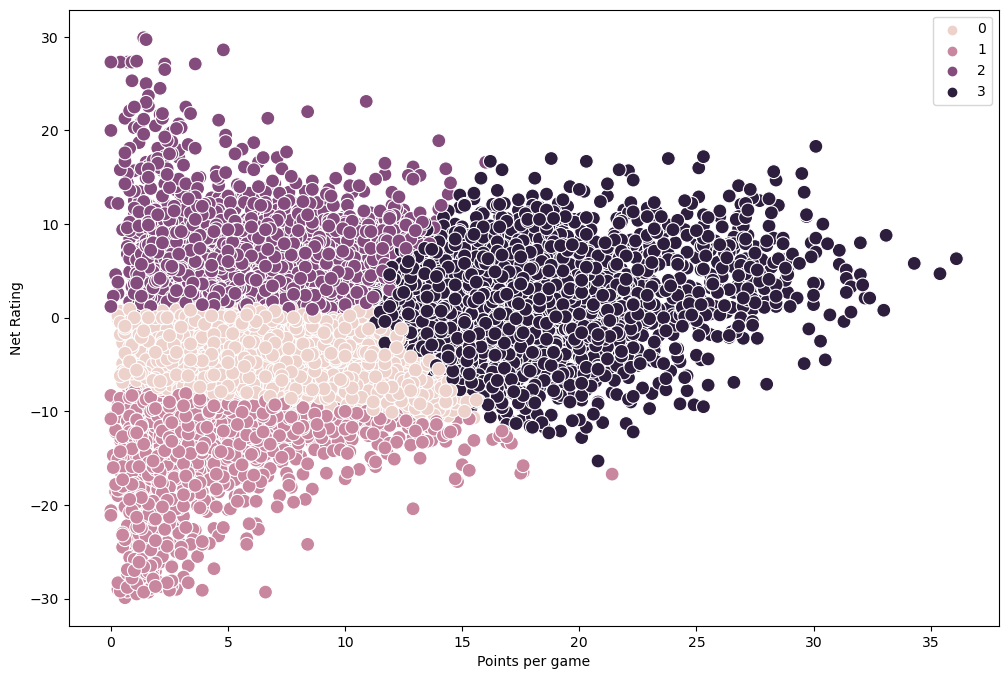

In [23]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['pts'], y=sub['net_rating'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Points per game') # Label x-axis.
plt.ylabel('Net Rating') # Label y-axis.
plt.show()

C:\Users\logan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\logan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\logan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


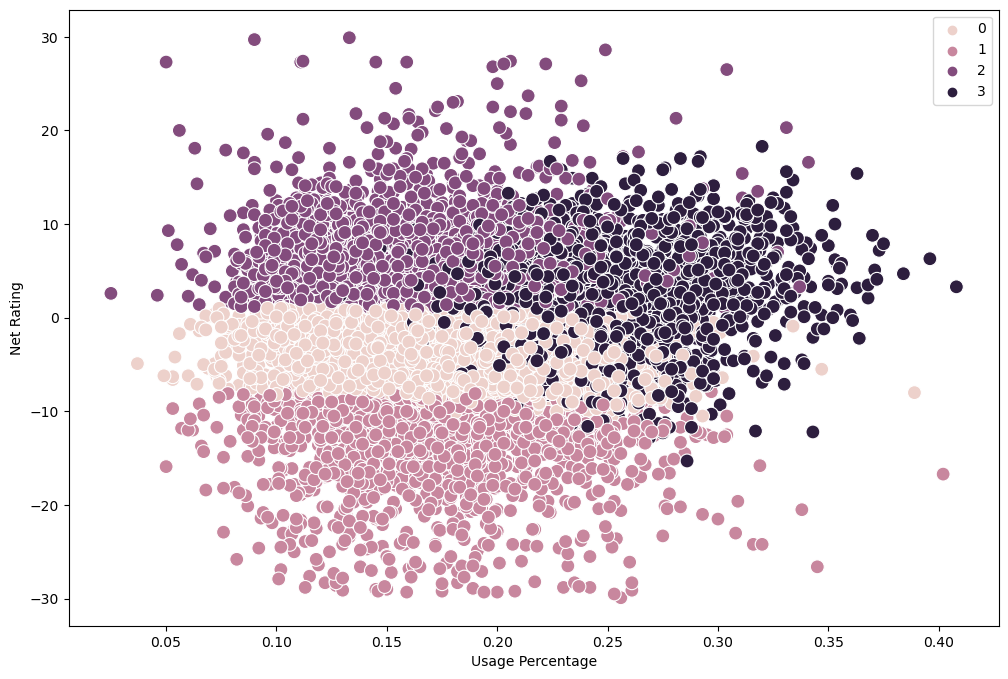

In [24]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['usg_pct'], y=sub['net_rating'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Usage Percentage') # Label x-axis.
plt.ylabel('Net Rating') # Label y-axis.
plt.show()

C:\Users\logan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\logan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\logan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


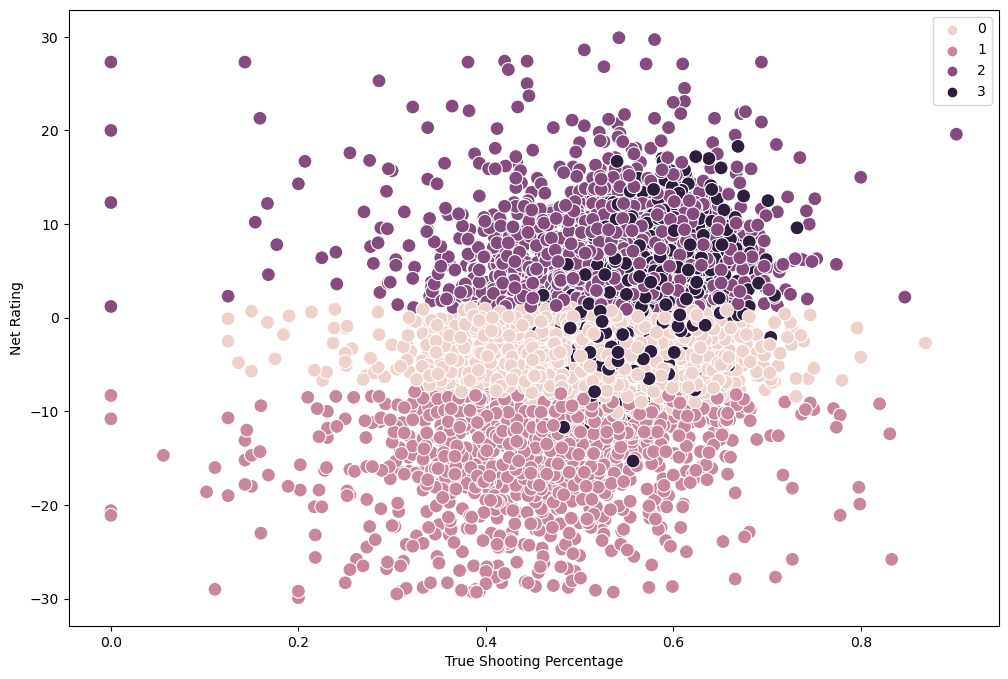

In [25]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['ts_pct'], y=sub['net_rating'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('True Shooting Percentage') # Label x-axis.
plt.ylabel('Net Rating') # Label y-axis.
plt.show()

### I prefer 3 clusters

In [26]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [27]:
sub['clusters'] = kmeans.fit_predict(sub)

C:\Users\logan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\logan\AppData\Local\Temp\ipykernel_58204\3683309691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['clusters'] = kmeans.fit_predict(sub)


In [28]:
sub['clusters'].value_counts()

clusters
1    5068
0    4269
2    2826
Name: count, dtype: int64

C:\Users\logan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\logan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\logan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


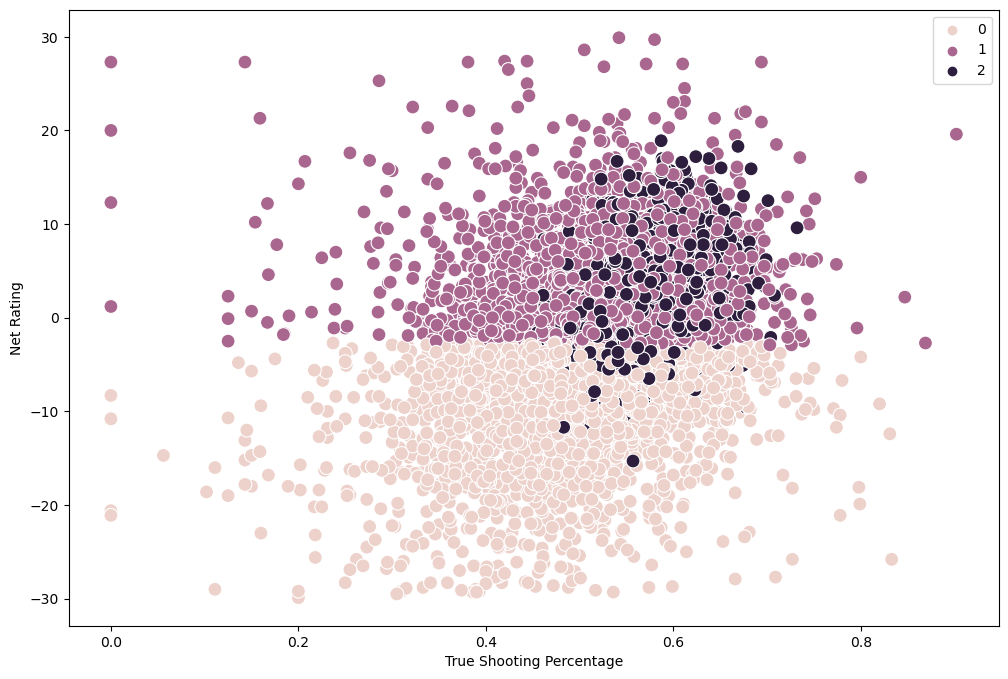

In [29]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['ts_pct'], y=sub['net_rating'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('True Shooting Percentage') # Label x-axis.
plt.ylabel('Net Rating') # Label y-axis.
plt.show()

C:\Users\logan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\logan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\logan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


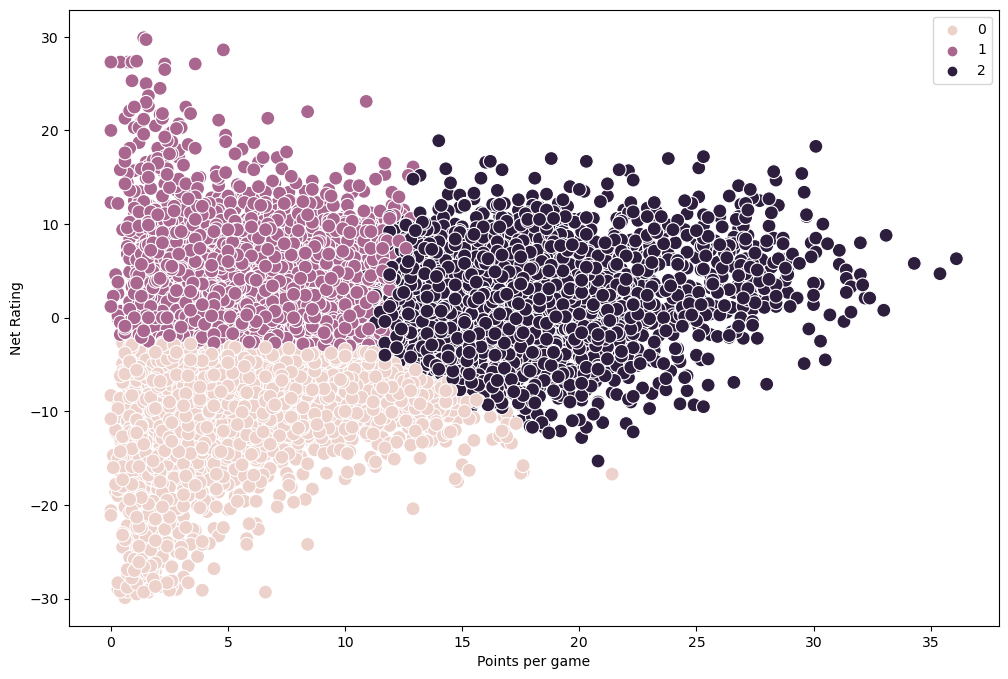

In [30]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['pts'], y=sub['net_rating'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Points per game') # Label x-axis.
plt.ylabel('Net Rating') # Label y-axis.
plt.show()

### the clustering of the scatterplot above makes more sense, in that dark is negative role type player, purple is positive role type player, and pink is more of a star player.

In [31]:
sub.loc[sub['clusters'] == 2, 'cluster'] = 'dark'
sub.loc[sub['clusters'] == 1, 'cluster'] = 'purple'
sub.loc[sub['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\logan\AppData\Local\Temp\ipykernel_58204\2493361149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub.loc[sub['clusters'] == 2, 'cluster'] = 'dark'
C:\Users\logan\AppData\Local\Temp\ipykernel_58204\2493361149.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'dark' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  sub.loc[sub['clusters'] == 2, 'cluster'] = 'dark'


In [32]:
sub.groupby('cluster').agg({'net_rating':['mean', 'median'], 
                         'pts':['mean', 'median'], 
                         'usg_pct':['mean', 'median']})

net_rating               pts          usg_pct       
              mean median       mean median      mean median
cluster                                                     
dark      1.673815    1.6  17.334855   16.4  0.237194  0.234
pink     -8.875591   -7.6   5.513282    4.8  0.174335  0.174
purple    2.864897    1.9   6.190470    6.1  0.164916  0.164

In [33]:
#adding games played after to see if games played is different in the different groups since it messed up the charts
sub['gp'] = df['gp'].values

C:\Users\logan\AppData\Local\Temp\ipykernel_58204\2143884331.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['gp'] = df['gp'].values


In [34]:
sub.groupby('cluster').agg({'net_rating':['mean', 'median'], 
                         'pts':['mean', 'median'], 
                         'usg_pct':['mean', 'median'],
                           'gp':['mean', 'median']})

net_rating               pts          usg_pct                gp       
              mean median       mean median      mean median       mean median
cluster                                                                       
dark      1.673815    1.6  17.334855   16.4  0.237194  0.234  67.744161   72.0
pink     -8.875591   -7.6   5.513282    4.8  0.174335  0.174  43.623799   44.0
purple    2.864897    1.9   6.190470    6.1  0.164916  0.164  54.649961   60.0

### Adding games played helped showcases that positive role players get to play more games than negative ones, while stars get the most

### It could be useful to see the average number of each on a playoff team, championship team, etc.

In [35]:
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'stats cleaned.csv'))
sub.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'clusters.csv'))